In [1]:
from src.data.dataset_functions import get_dataframe

dataFrame = get_dataframe(True)
dataFrame.printSchema()

providing ../data/raw/2022_place_canvas_history-000000000050.csv ...
../data/raw/2022_place_canvas_history-000000000050.csv is already in data/raw
:: loading settings :: url = jar:file:/usr/local/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/vscode/.ivy2/cache
The jars for the packages stored in: /home/vscode/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-4a72b20e-8187-420a-9206-154fd765f582;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 80ms :: artifacts dl 4ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	----------------------------------

root
 |-- user_id: string (nullable = true)
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- t: long (nullable = true)
 |-- pixel_color: string (nullable = true)



In [2]:
from src.features.feature_functions import group_dataframe_by_color

groupedFrame = group_dataframe_by_color(dataFrame)
groupedFrame.printSchema()

root
 |-- pixel_color: string (nullable = true)
 |-- count: long (nullable = false)
 |-- collect_list(user_id): array (nullable = false)
 |    |-- element: string (containsNull = false)
 |-- collect_list(x): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(y): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(t): array (nullable = false)
 |    |-- element: long (containsNull = false)



In [3]:
groupedFrame.show(1)

+-----------+------+---------------------+--------------------+--------------------+--------------------+
|pixel_color| count|collect_list(user_id)|     collect_list(x)|     collect_list(y)|     collect_list(t)|
+-----------+------+---------------------+--------------------+--------------------+--------------------+
|    #000000|859144| [xHWcOdv98PR7yQNK...|[21, 1406, 1378, ...|[1691, 671, 649, ...|[0, 0, 0, 0, 0, 0...|
+-----------+------+---------------------+--------------------+--------------------+--------------------+
only showing top 1 row



D.h. die am meisten genutze Farbe ist #000000, also Schwarz. In dem Testdatensatz insgesamt 859.144 Mal.

In [6]:
droppedFrame = groupedFrame.drop('collect_list(t)').drop('collect_list(user_id)').drop('collect_list(x)').drop('collect_list(y)')
droppedFrame.printSchema()

root
 |-- pixel_color: string (nullable = true)
 |-- count: long (nullable = false)



In [4]:
droppedFrame.show(5)

+-----------+------+
|pixel_color| count|
+-----------+------+
|    #000000|859144|
|    #FFFFFF|628852|
|    #FF4500|234288|
|    #2450A4|221772|
|    #BE0039|187314|
+-----------+------+
only showing top 5 rows



In [5]:
datacollect = droppedFrame.head(5)

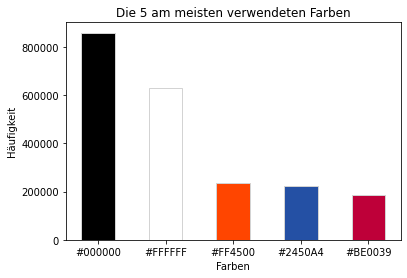

In [10]:
from src.visualization.visuialization_functions import show_and_save
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for row in datacollect:
    pixel_color,count = list(row)
    plt.bar(pixel_color,count,color = pixel_color, edgecolor = 'lightgrey', width=0.5)
plt.title('Die 5 am meisten verwendeten Farben')
plt.ylabel('Häufigkeit')
plt.xlabel('Farben')
plt.savefig('../reports/figures/top5_genutze_Farben.jpg',bbox_inches = 'tight')
plt.show()